# 機械学習2024 Week13 課題

TechFUL Pro 画像認識課題（初級）  
じゃんけん画像を２分類しよう

In [1]:
import pandas as pd
import numpy as np


【1】訓練データの csv ファイルを読み込む部分のプログラムを作成し、正しく、データが読み込まれているかを確認しましょう。  
【2】訓練データの画像データとラベルが対応するようにデータを構成しましょう。

In [12]:
# 確認用　表示関数

import matplotlib.pylab as plt

# オリジナルデータを画像で表示・確認
def show_image( X ):
    fig = plt.figure(figsize=(9.6,4.8))
    for ind in range(8):
        ax = fig.add_subplot(2,4,ind+1)
        ax.imshow(np.reshape(X[ind],[32,32,3]),cmap="brg")
        ax.axis("off")
    plt.show()

# データを2次元で表示・確認
def plot2D(X, Y=None, xLabel="$z_1$",yLabel="$z_2$",fName=""):
    col = ['gray','white','black']
    # 主成分得点のプロット
    if isinstance(Y, np.ndarray):
        for k in [0, 1]:
            plt.plot(X[Y==k, 0],X[Y==k,1], col[k],
                         marker = 'o', linestyle='None',
                         markeredgecolor='black' )
    else:
        plt.plot(X[:,0],X[:,1],'k.',markersize=14)
        
    # 各軸の範囲とラベルの設定
    plt.xlabel(xLabel,fontsize=14)
    plt.ylabel(yLabel,fontsize=14)

    # グラフの表示またはファイルへの保存
    if len(fName):
        plt.savefig(fName)
    else:
        plt.show()

shape of Y : (80,)
shape of X : (80, 3072)


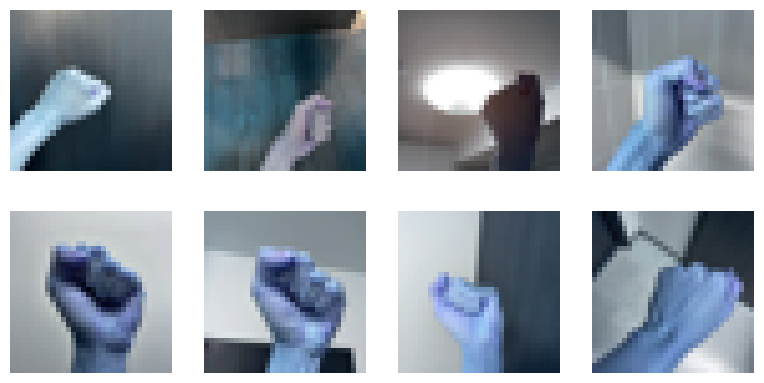

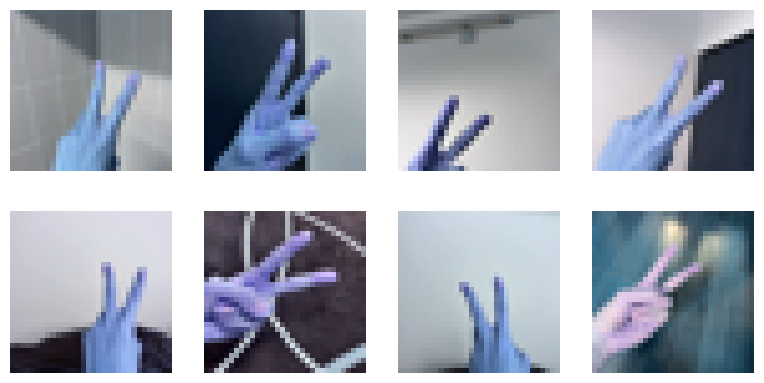

In [13]:
# pandas.DataFrame を用いてCSVファイルを読み込む（p.34 : 2.3.20)
data = pd.read_csv('Easy/train.csv')

# Y : ラベルデータを numpy.array 形式で取得する
Y = data['label'].values

# X : 画像データを numpy.array 形式で取得する．
data = data.drop(['id','label'],axis=1)
X = data.values

# Y, X それぞれのサイズを確認
print( f"shape of Y : {Y.shape}")
print( f"shape of X : {X.shape}") # 1画像あたり 32 x 32 x 3 = 3072 次元のデータ点となる

# 読み込んだデータを画像として確認する
show_image (X[0:8]) # グー（ラベル 0）の例
show_image (X[40:48]) # チョキ（ラベル 1）の例

【3】訓練データの画像データから、対応するラベルを予測できるようなモデルを構築し、後で読み込めるようにpickleなどで保存しましょう。

In [26]:
# 主成分分析（PCA）でデータの次元削減を行う．
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

# データの次元削減（主成分分析により16次元に次元削減）
pcaModel = PCA(n_components = 16)
pcaModel.fit(X)
Xpca = pcaModel.transform(X)

# 次元削減したデータに対してロジスティック回帰モデルを学習
clf = SVC()
clf.fit(Xpca, Y)

SVC()

              precision    recall  f1-score   support

           0       0.88      0.75      0.81        40
           1       0.78      0.90      0.84        40

    accuracy                           0.82        80
   macro avg       0.83      0.82      0.82        80
weighted avg       0.83      0.82      0.82        80


Confusion matrix:
[[30 10]
 [ 4 36]]


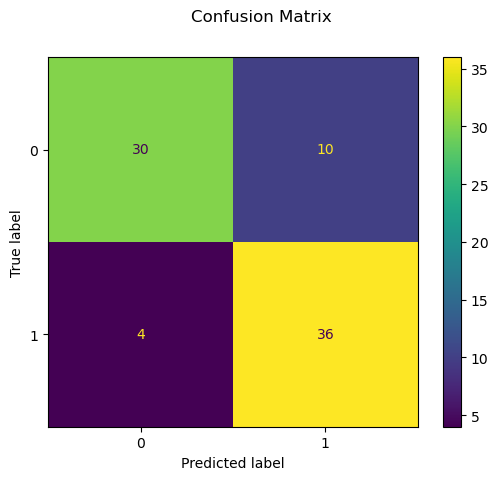

In [27]:
from sklearn import metrics

predicted = clf.predict(Xpca)

print(f"{metrics.classification_report(Y, predicted)}\n")

disp = metrics.ConfusionMatrixDisplay.from_predictions(Y, predicted)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

In [28]:
# モデルを pickle で保存する．

import pickle

pickle.dump(pcaModel, open('pca_mdl.pkl','wb'))
pickle.dump(clf, open('clf_mdl.pkl','wb'))